### Behind the pipeline


In [1]:
from transformers import pipeline

classifier = pipeline('sentiment-analysis')

d:\Anaconda\envs\llm_course\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
d:\Anaconda\envs\llm_course\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Duc Anh\.cache\huggingface\hub\models--distilbert--distilbert-base-uncased-finetuned-sst-2-english. Caching files will still work but in a degraded version that might require more space on your disk. This warni

In [2]:
classifier(
    [
        "I've been waiting for a HuggingFace course my whole life.",
        "I hate this so much!",
    ]
)

[{'label': 'POSITIVE', 'score': 0.9598046541213989},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

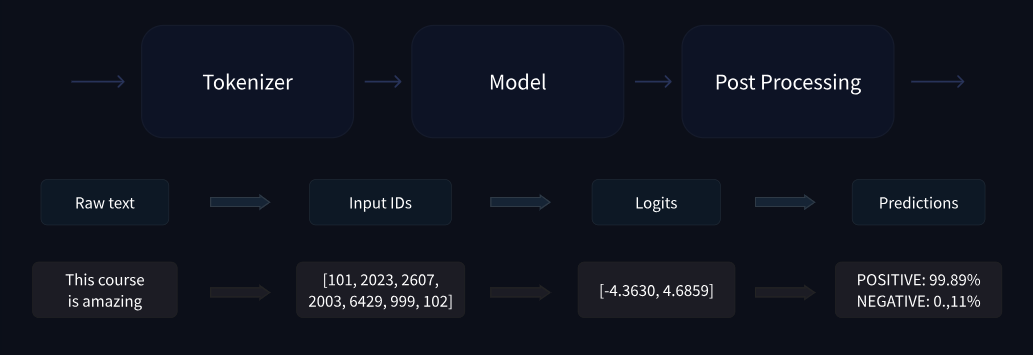

### Preprocessing with tokenizer
- Như các mô hình khác, transformer không thể xử lý trực tiếp dữ liệu văn bản, cần chia văn bản thành các token, chuyển token thành số, thêm các input có thể hữu dụng trong quá trình xử lý.

1. Word-based
    - Tách văn bản thành các từ dựa trên dấu cách hoặc dấu câu.
    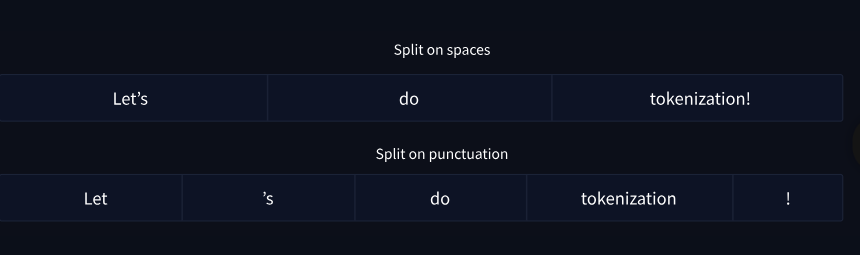

In [1]:
tokenized_text = "Jim Henson was a puppeteer".split()
print(tokenized_text)

['Jim', 'Henson', 'was', 'a', 'puppeteer']


- Vấn đề: Số lượng từ quá lớn. Nếu tách theo dấu cách, dấu câu thì các từ như dog, dogs đc coi là hai từ khác nhau -> cần stemming để giảm slg vocab.

2. Tách theo character
- Giảm được số lượng vocab.
- Vấn đề, biểu diễn có thể sẽ không mang ý nghĩa. Tăng lượng token phải xử lý.
3. Subword tokenization
- Nguyên tắc: những từ hay được sử dụng không nên bị chia thành các từ nhỏ hơn. Các từ ít xuất hiện thì nên bị chia thành các từ nhỏ có ý nghĩa hơn.
- Ví dụ: Annoyingly có thể coi là từ hiếm và có thể chia thành annoying và ly là các từ có tần suất xuất nhiện nhiều hơn.
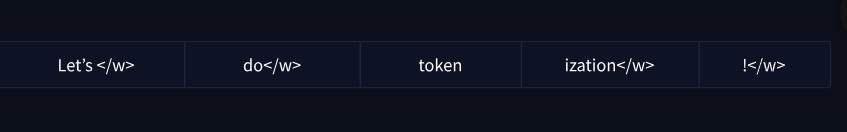
4. BPE tokenization
- BPE gồm hai giai đoạn: Training và Encoding
    + Training: 
        1. Khởi tạo từ vựng ban đầu: Tách văn bản thành các từ, sau đó chia mỗi từ thành các ký tự riêng lẻ: low thành l, o, w.
        2. Thống kê tần suất các cặp ký tự liền kề: Đếm số lần xuất hiện của các cặp như (l, o), (0, w).
        3. Ghép cặp xuất hiện nhiều nhất thành một token mới: Nếu (l, o) xuất hiện nhiều nhất thì thêm lo vào từ vựng, low -> lo, w; lower -> lo, w, e, r.
        4. Lặp lại quá trình cho đến khi đạt số lượng token mong muốn hoặc không còn cặp nào để ghép.
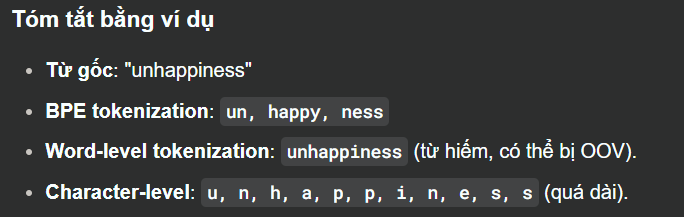